In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

In [4]:
input_shape = (rows,cols,1) 

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()
  
  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))
  
  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', kernel_regularizer=regularizers.l2(0.01)))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Dropout Layer
  model.add(tf.keras.layers.Dropout(0.5))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # Compile the Model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [6]:
lenet = build_lenet(input_shape)

history = lenet.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

c:\Users\visha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7984 - loss: 0.7701 - val_accuracy: 0.9321 - val_loss: 0.2692
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9112 - loss: 0.3392 - val_accuracy: 0.9492 - val_loss: 0.2024
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9282 - loss: 0.2725 - val_accuracy: 0.9594 - val_loss: 0.1652
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9417 - loss: 0.2245 - val_accuracy: 0.9653 - val_loss: 0.1349
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9528 - loss: 0.1822 - val_accuracy: 0.9696 - val_loss: 0.1195
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9607 - loss: 0.1546 - val_accuracy: 0.9757 - val_loss: 0.0946
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9659 - loss: 0.1341 - val_accuracy: 0.9768 - val_loss: 0.0891
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9681 - loss: 0.1270 - val_accuracy: 0.

In [7]:
# Check Accuracy of the Model
loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0837
Accuracy :  0.9818000197410583


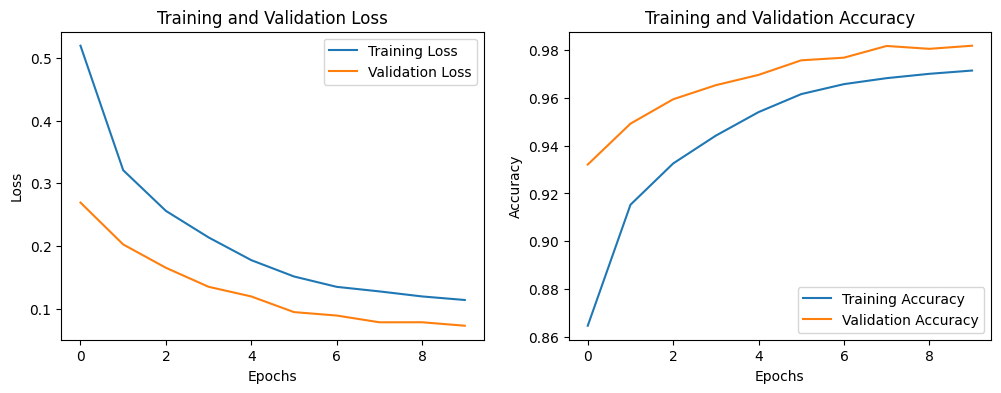

In [8]:
# Visualize the Training and Validation Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


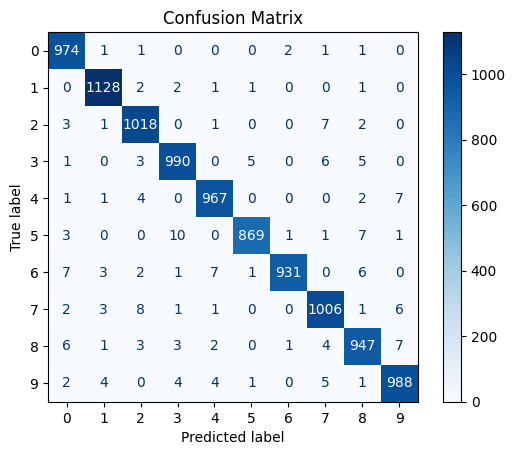

In [9]:
# Predict class labels for test data
y_pred = np.argmax(lenet.predict(x_test), axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
